## 1. Context

This is a **multivariate dataset**, meaning it contains multiple variables describing each patient.

- The dataset consists of **14 commonly used clinical attributes**
- Although the full database contains **76 attributes**, most studies use this 14-feature subset
- The **Cleveland dataset** is the most widely used version in machine learning research

### Objective
There are two primary goals when working with this dataset:
1. **Prediction task**: Determine whether a patient has heart disease
2. **Exploratory task**: Identify clinical patterns and risk factors associated with heart disease

---

## 2. Dataset Content

### 2.1 Column Descriptions

#### Identifier
- **id**: Unique identifier for each patient

---

#### Demographic Features
- **age**: Age of the patient (years)
- **sex**: Biological sex  
  - Values: `Male`, `Female`
- **origin**: Place of study / data source

---

#### Clinical Measurements
- **trestbps**: Resting blood pressure (mm Hg)
- **chol**: Serum cholesterol (mg/dl)
- **thalach**: Maximum heart rate achieved
- **oldpeak**: ST depression induced by exercise relative to rest

---

#### Categorical Clinical Indicators
- **cp**: Chest pain type  
  - Values: `typical angina`, `atypical angina`, `non-anginal`, `asymptomatic`

- **fbs**: Fasting blood sugar > 120 mg/dl  
  - Values: `True`, `False`

- **restecg**: Resting electrocardiographic results  
  - Values:
    - `normal`
    - `ST-T wave abnormality`
    - `left ventricular hypertrophy`

- **exang**: Exercise-induced angina  
  - Values: `True`, `False`

- **slope**: Slope of the peak exercise ST segment

- **ca**: Number of major vessels (0–3) colored by fluoroscopy

- **thal**: Thalassemia status  
  - Values:
    - `normal`
    - `fixed defect`
    - `reversible defect`

---

### 2.2 Target Variable

- **num**: Heart disease diagnosis  
  - Indicates the **presence or absence of heart disease**
  - Used as the **target variable** in prediction tasks


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
df.shape

(920, 16)

In [7]:
# Fields with missing values/nulls descending order
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64

In [8]:
# How much of a percentage damage do they cause with null before deciding to drop it or not
(df.isnull().mean() * 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

In [9]:
# Numeric - Replace missing values using the typical value within a similar group.
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical - Fill with "Unknown" for null object type
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('Unknown')


In [10]:
# recheck
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
#Run this if has duplicate
#df = df.drop_duplicates()
#df.duplicated().sum()

In [13]:
df.drop(columns=['id'])
np.round(df.describe(),2)

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.00,920.00,920.00,920.00,920.00,920.00,920.00,920.00
mean,460.50,53.51,132.00,199.91,137.69,0.85,0.23,1.00
std,265.73,9.42,18.45,109.04,25.15,1.06,0.63,1.14
min,1.00,28.00,0.00,0.00,60.00,-2.60,0.00,0.00
25%,230.75,47.00,120.00,177.75,120.00,0.00,0.00,0.00
50%,460.50,54.00,130.00,223.00,140.00,0.50,0.00,1.00
75%,690.25,60.00,140.00,267.00,156.00,1.50,0.00,2.00
max,920.00,77.00,200.00,603.00,202.00,6.20,3.00,4.00


In [14]:
summary = []

for col in df.select_dtypes(include='number'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    std = df[col].std()
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    
    # Variability flag
    tight_distribution = "Yes" if std < IQR else "No"

    summary.append({
        'Column': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Std': std,
        'Lower_Bound': lower,
        'Upper_Bound': upper,
        'Outlier_Count': outlier_count,
        'Tight_Distribution': tight_distribution
    })

summary_df = pd.DataFrame(summary)
summary_df

,Column,Q1,Q3,IQR,Std,Lower_Bound,Upper_Bound,Outlier_Count,Tight_Distribution
0,id,230.75,690.25,459.50,265.725422,-458.500,1379.500,0,Yes
1,age,47.00,60.00,13.00,9.424685,27.500,79.500,0,Yes
2,trestbps,120.00,140.00,20.00,18.451300,90.000,170.000,28,Yes
3,chol,177.75,267.00,89.25,109.040171,43.875,400.875,185,No
4,thalch,120.00,156.00,36.00,25.145235,66.000,210.000,2,Yes
5,oldpeak,0.00,1.50,1.50,1.058049,-2.250,3.750,16,Yes
6,ca,0.00,0.00,0.00,0.628936,0.000,0.000,128,No
7,num,0.00,2.00,2.00,1.142693,-3.000,5.000,0,Yes


In [15]:
# Divide columns to numerical and categorical gr
# Step 1: dtype split
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(exclude='number').columns.tolist()

# Step 2: low-cardinality numerics
low_cardinality = [col for col in num_cols if df[col].nunique() < 10]
cat_cols += low_cardinality
num_cols = [col for col in num_cols if col not in low_cardinality]

# Step 3: ID-like columns
id_keywords = ['id', 'code', 'zip']
id_cols = [col for col in num_cols if any(k in col.lower() for k in id_keywords)]
cat_cols += id_cols
num_cols = [col for col in num_cols if col not in id_cols]

print("Numerical:", num_cols)
print("Categorical:", cat_cols)


Numerical: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
Categorical: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'num', 'id']


# Remove Outliners
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [17]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

In [18]:
# Check after outliners removed
print(df.shape)

(920, 16)



🎯 Target Variable Distribution (Disease Severity):
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


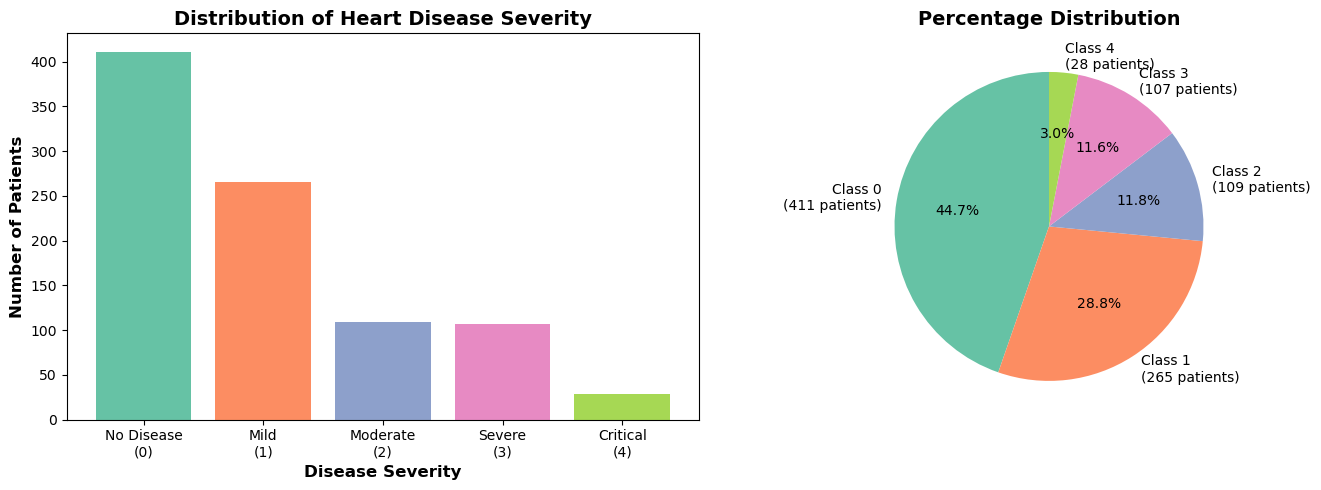

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target variable distribution
print("\n🎯 Target Variable Distribution (Disease Severity):")
target_dist = df['num'].value_counts().sort_index()
print(target_dist)

# Get colors from Seaborn Set2 palette
colors = sns.color_palette('Set2', n_colors=len(target_dist))

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot (vertical bars)
axes[0].bar(target_dist.index, target_dist.values, color=colors)
axes[0].set_xlabel('Disease Severity', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Heart Disease Severity', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(len(target_dist)))
axes[0].set_xticklabels(['No Disease\n(0)', 'Mild\n(1)', 'Moderate\n(2)',
                         'Severe\n(3)', 'Critical\n(4)'])

# Percentage pie chart
axes[1].pie(
    target_dist.values,
    labels=[f'Class {i}\n({v} patients)' for i, v in target_dist.items()],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
axes[1].set_title('Percentage Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [20]:
# Calculate counts
target_counts = df['num'].value_counts().sort_index()

# Total number of patients
total = len(df)

# Prepare formatted summary
for cls, count in target_counts.items():
    percentage = count / total * 100
    # Map numeric class to descriptive label
    if cls == 0:
        label = 'No Disease'
    elif cls == 1:
        label = 'Mild'
    elif cls == 2:
        label = 'Moderate'
    elif cls == 3:
        label = 'Severe'
    elif cls == 4:
        label = 'Critical'
    else:
        label = 'Unknown'
    print(f"Class {cls} ({label}): {count} patients ({percentage:.1f}%)")


Class 0 (No Disease): 411 patients (44.7%)
Class 1 (Mild): 265 patients (28.8%)
Class 2 (Moderate): 109 patients (11.8%)
Class 3 (Severe): 107 patients (11.6%)
Class 4 (Critical): 28 patients (3.0%)


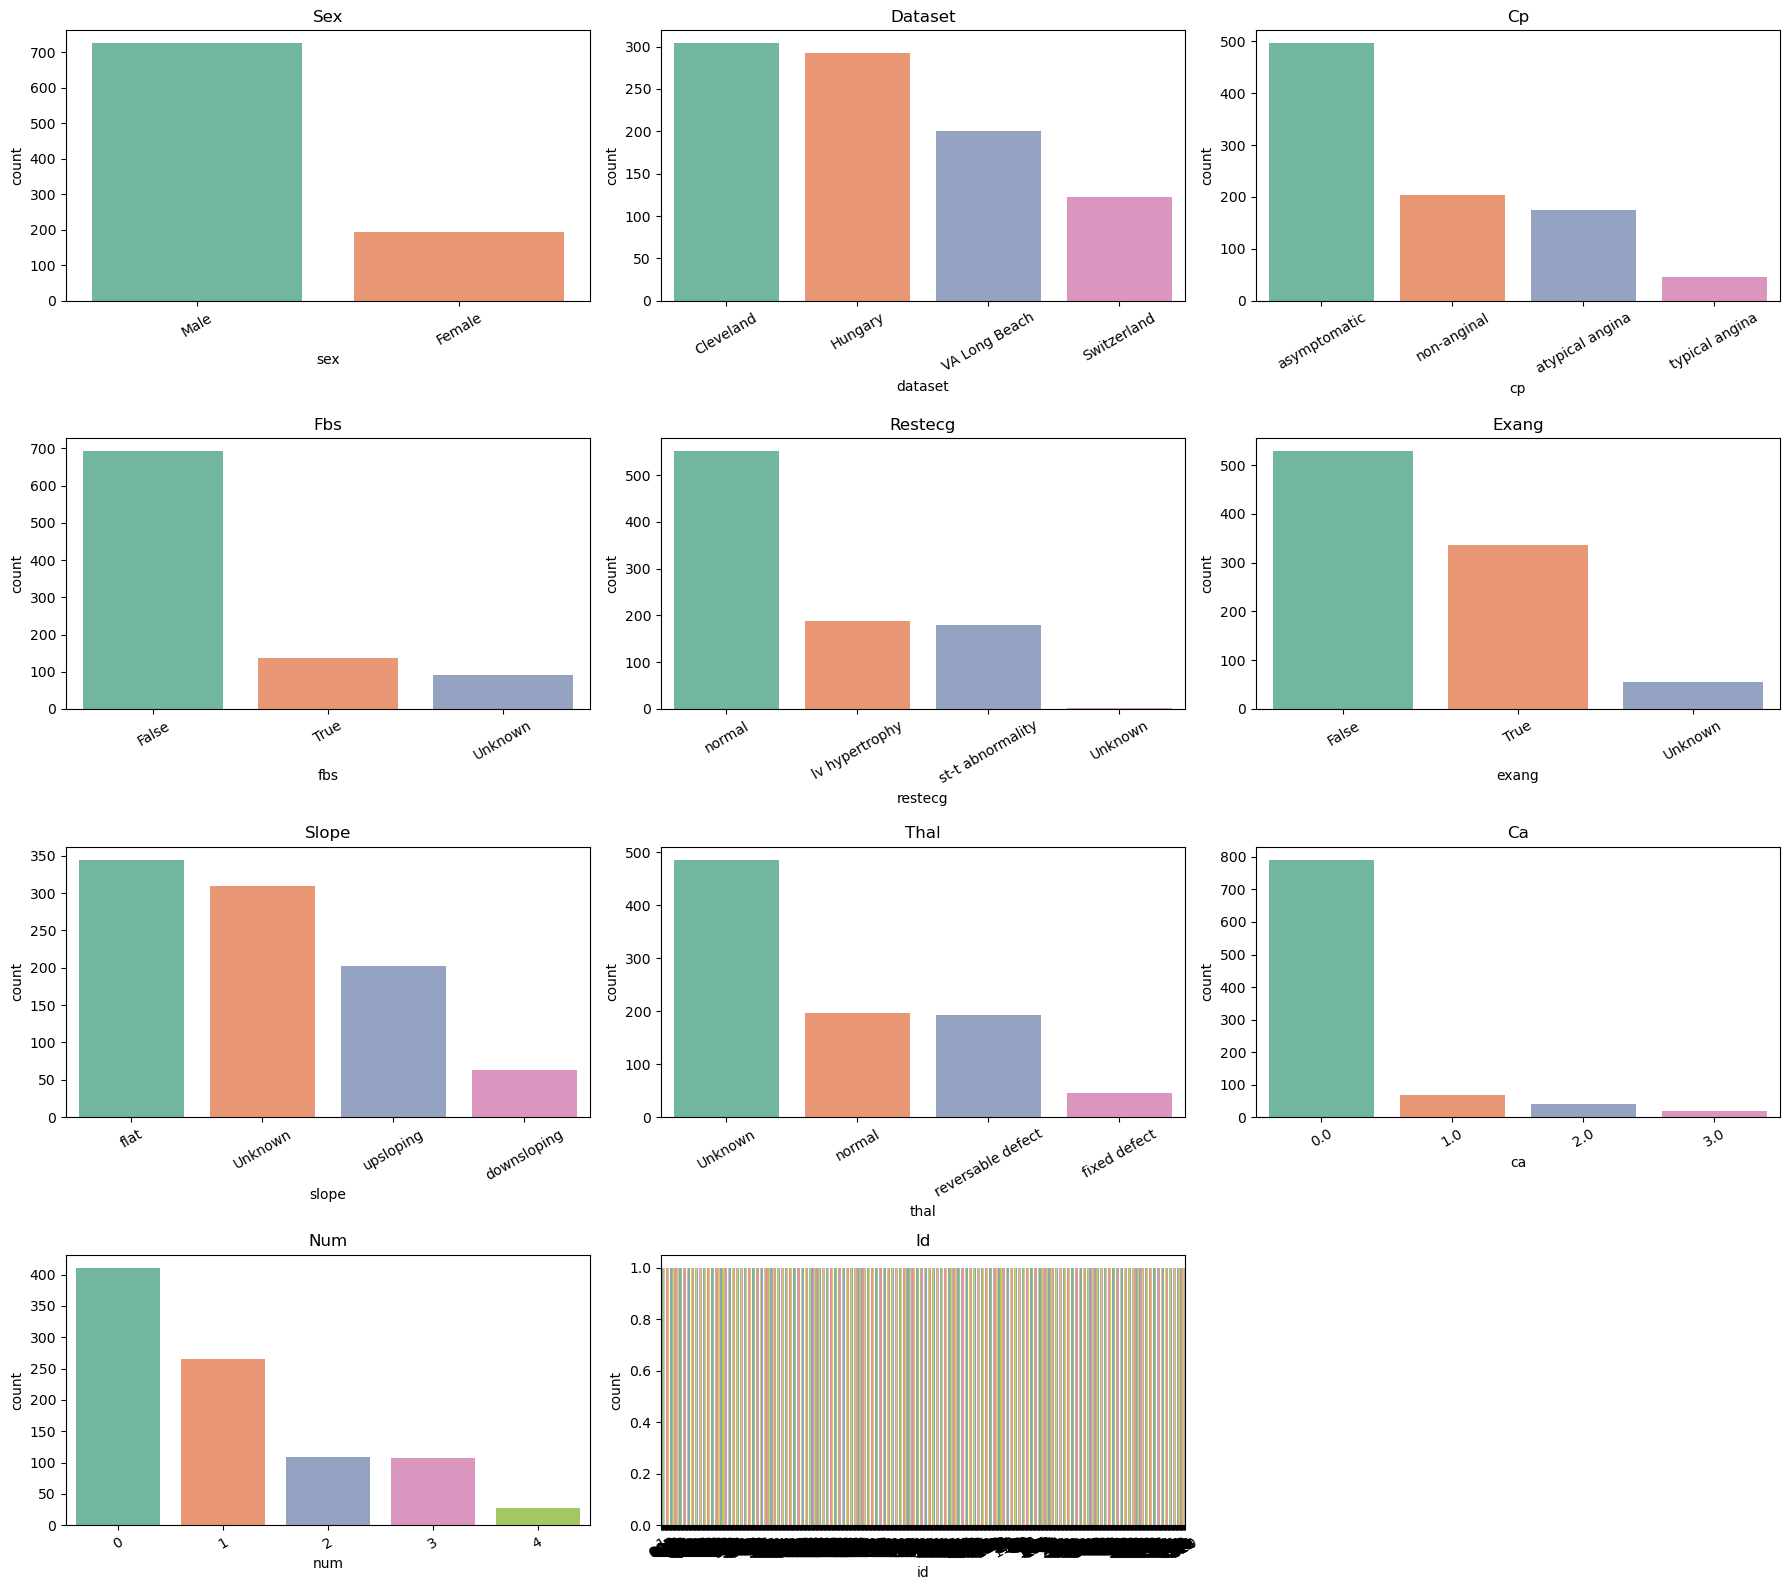

In [21]:
# Visualization on cat columns
import matplotlib.pyplot as plt
import seaborn as sns
import math

n_cols = 3  # number of plots per row
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='Set2',
                  order=df[col].value_counts().index)
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].tick_params(axis='x', rotation=30)  # make x-labels readable

# Remove unused subplots
for ax in axes[len(cat_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

#### Understanding `num` and Disease Rate

###### 1. `num` — Target Variable
- Represents **heart disease status** of a patient.  
- Binary categorical variable:
  - `0` → No heart disease  
  - `1` → Heart disease present  
- Stored as **numeric (0/1)** for analysis and modeling.

###### 2. Why `.mean()` is used
- Calculating `.mean()` on a **0/1 variable** gives the **proportion of “1”s**.  
- This is interpreted as the **disease rate** (probability of heart disease) in a group.

0.6 disease rate → 60% of patients with ca = 2 have heart disease


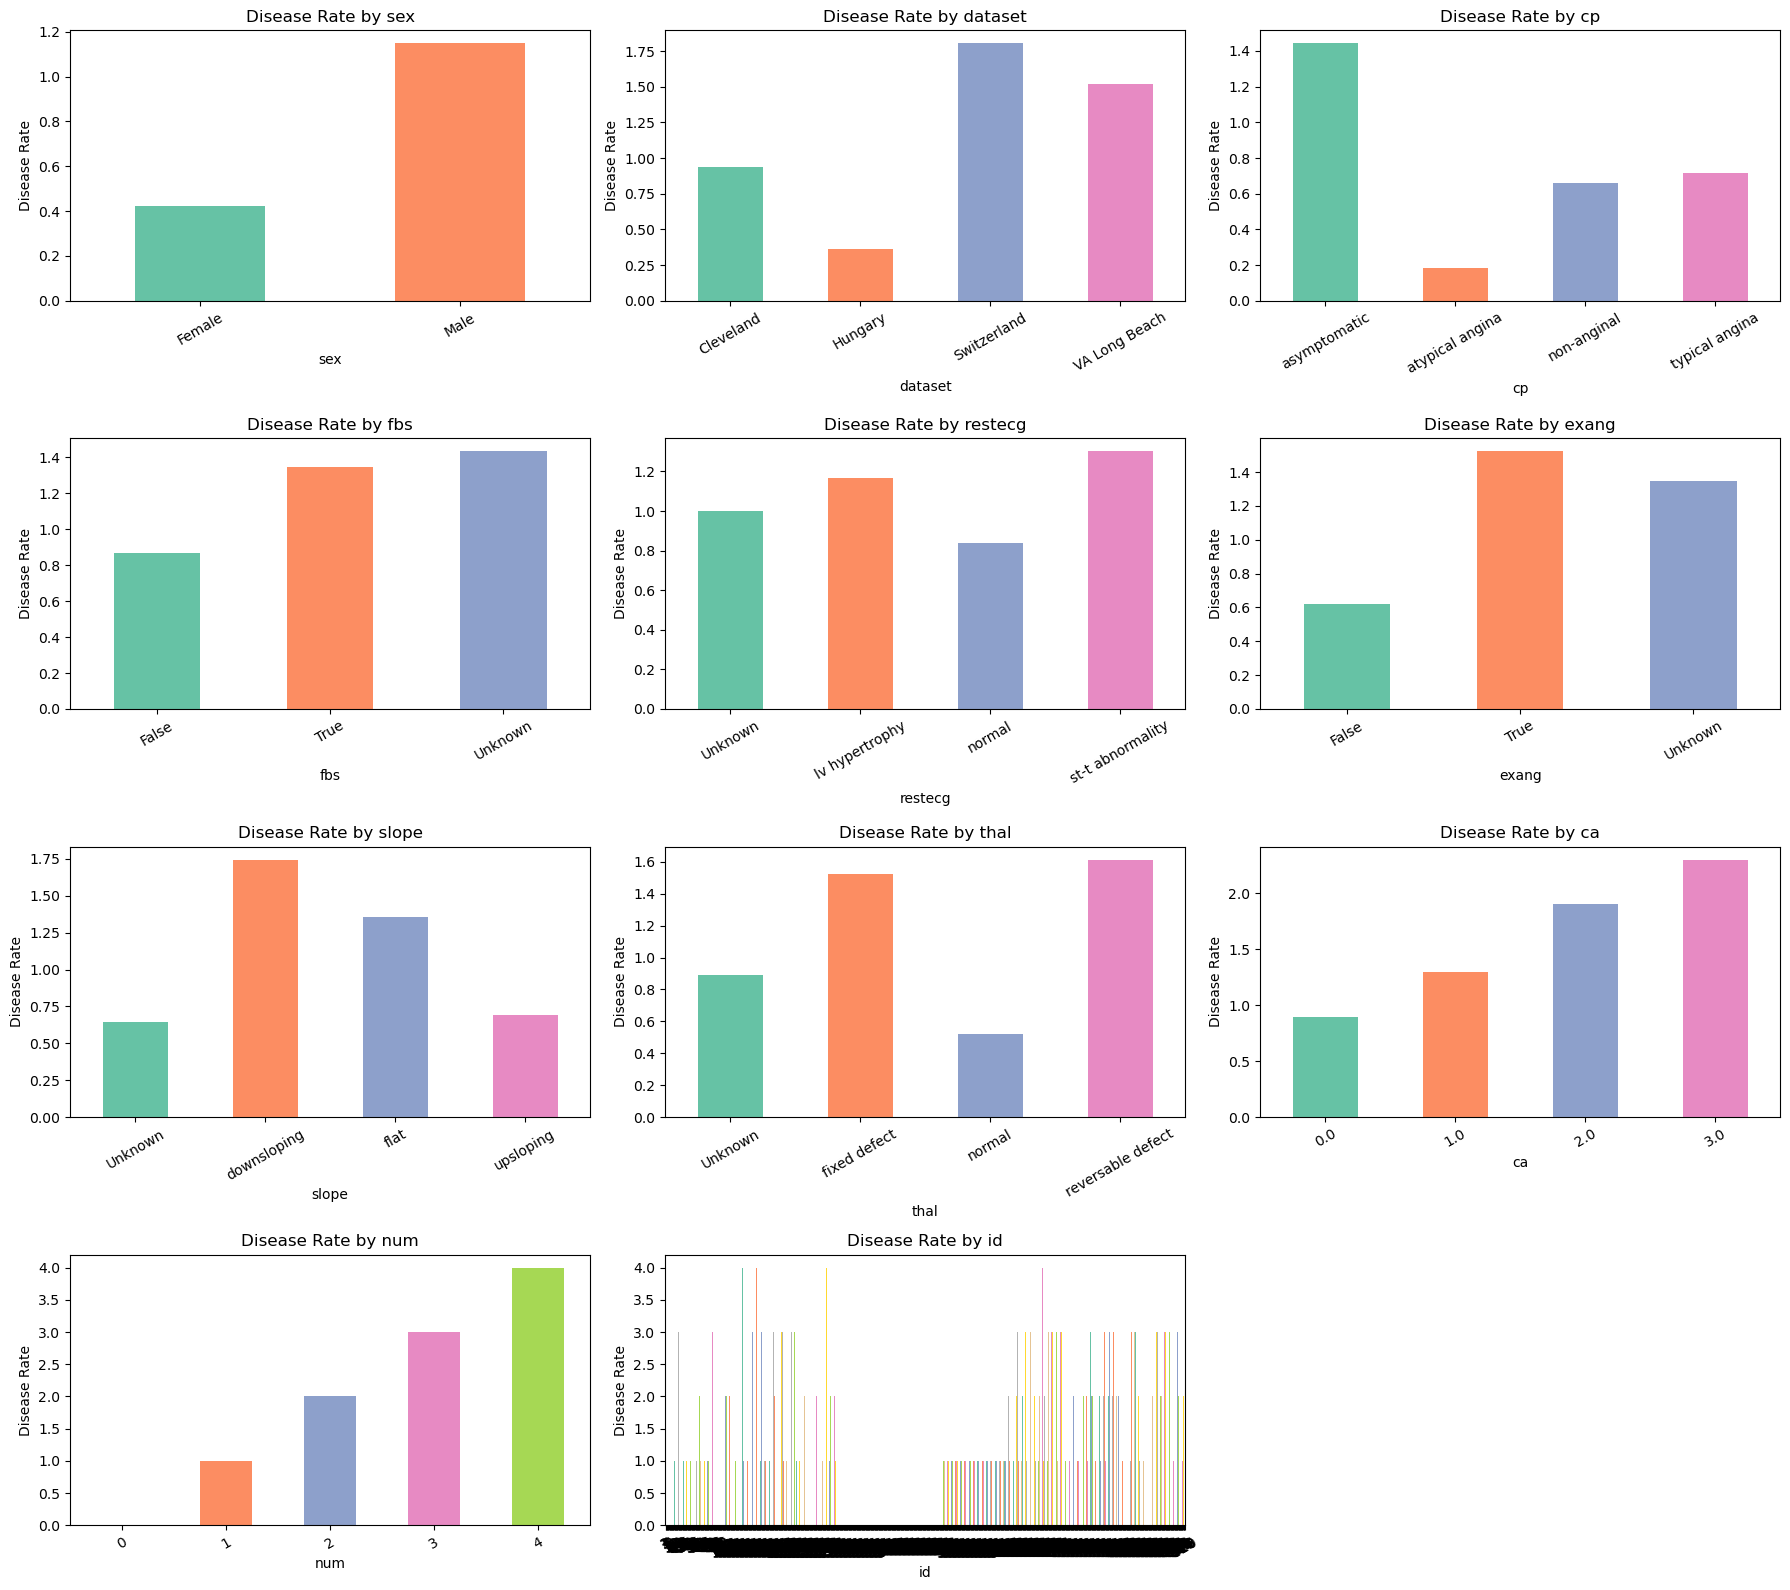

In [25]:
# ---------------------------
# 2️⃣ Categorical Columns – Disease Rate (Grid Layout)
# ---------------------------

n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    rate = df.groupby(col)['num'].mean()

    rate.plot(
        kind='bar',
        ax=axes[i],
        color=sns.color_palette('Set2', len(rate))
    )

    axes[i].set_title(f"Disease Rate by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Disease Rate")
    axes[i].tick_params(axis='x', rotation=30)

# Remove unused subplots
for ax in axes[len(cat_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


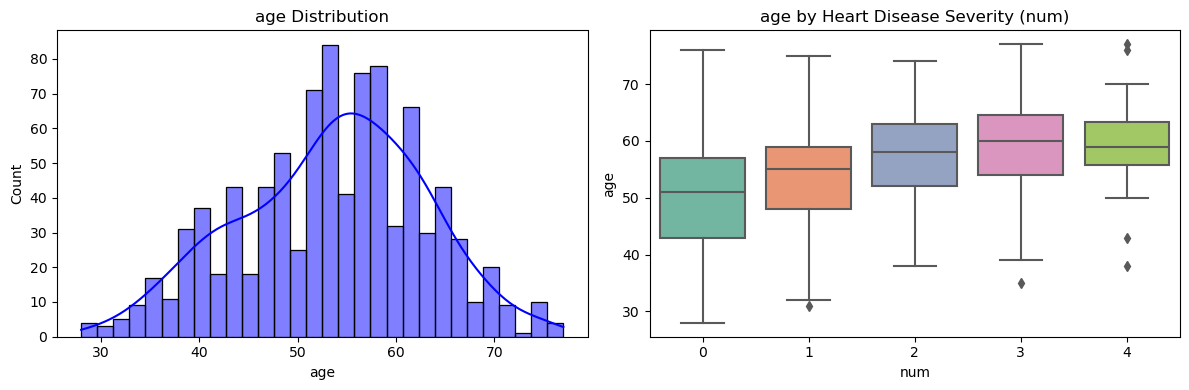

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


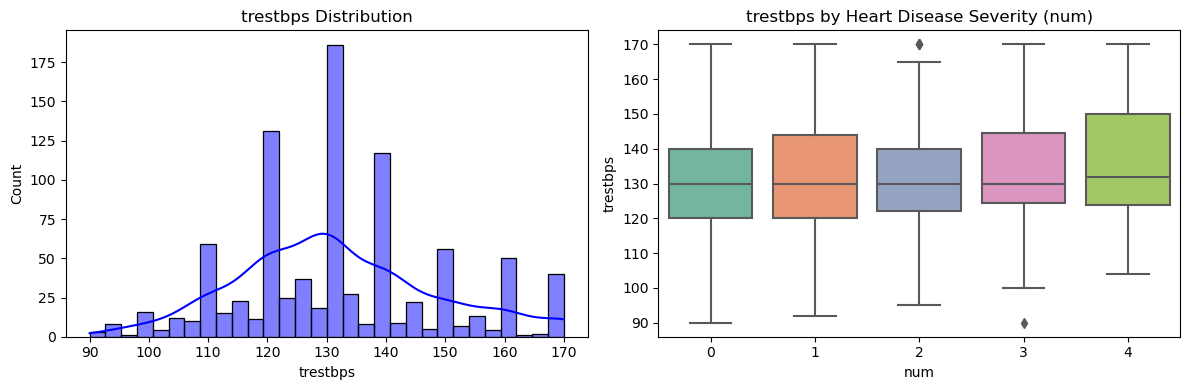

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


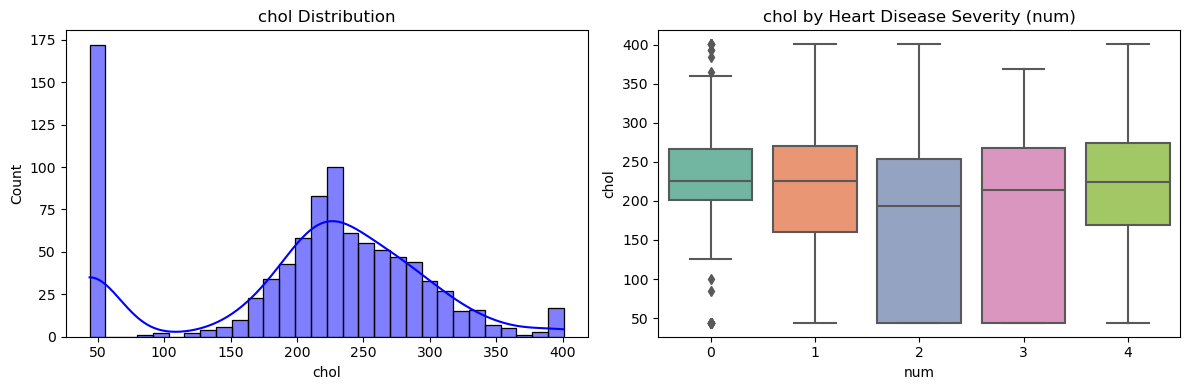

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


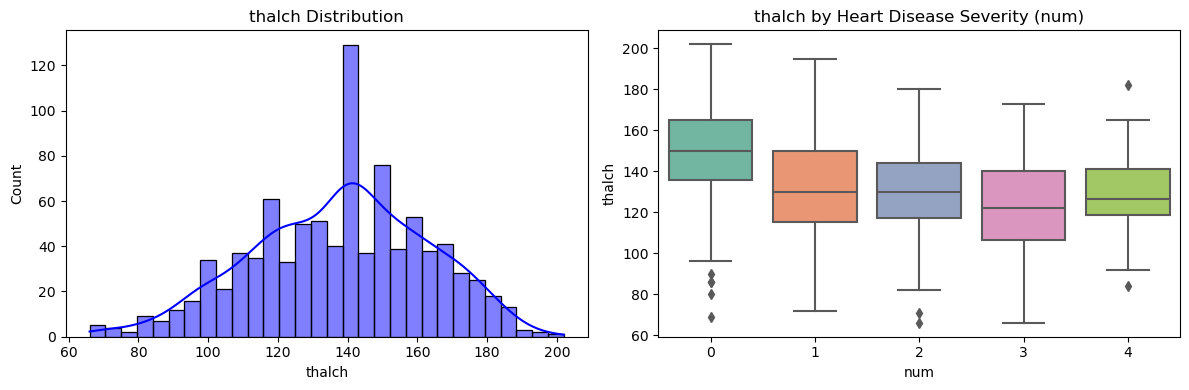

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


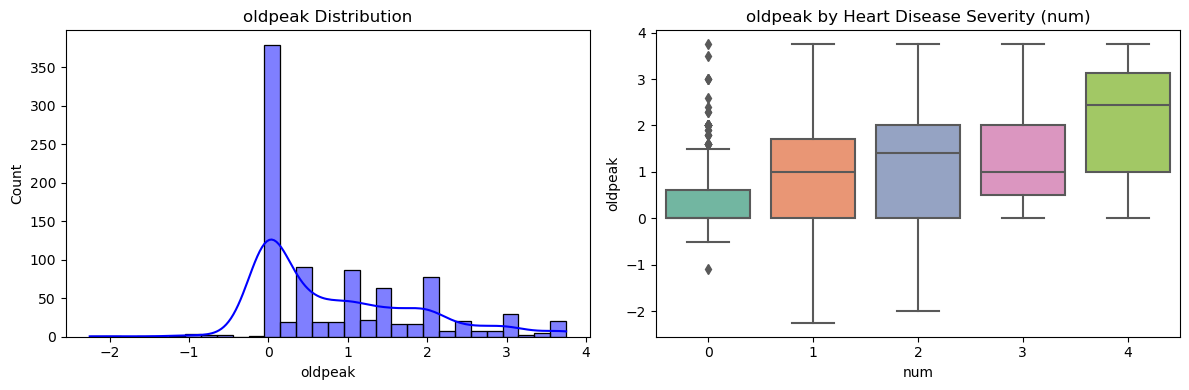

In [26]:
# Visual on numeric distribution and examine target variable on each field
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Distribution
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f"{col} Distribution")
    
    # Boxplot by target
    sns.boxplot(x='num', y=col, data=df, ax=axes[1], palette='Set2')
    axes[1].set_title(f"{col} by Heart Disease Severity (num)")
    
    plt.tight_layout()
    plt.show()

In [81]:
# Convert target to binary
# Binary target: 0 = no disease, 1 = disease
df['target'] = (df['num'] > 0).astype(int)

df[['num', 'target']].head()


,num,target
0,0,0
1,2,1
2,1,1
3,0,0
4,0,0


In [83]:
df['target'].value_counts(normalize=True)

target
1    0.553261
0    0.446739
Name: proportion, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


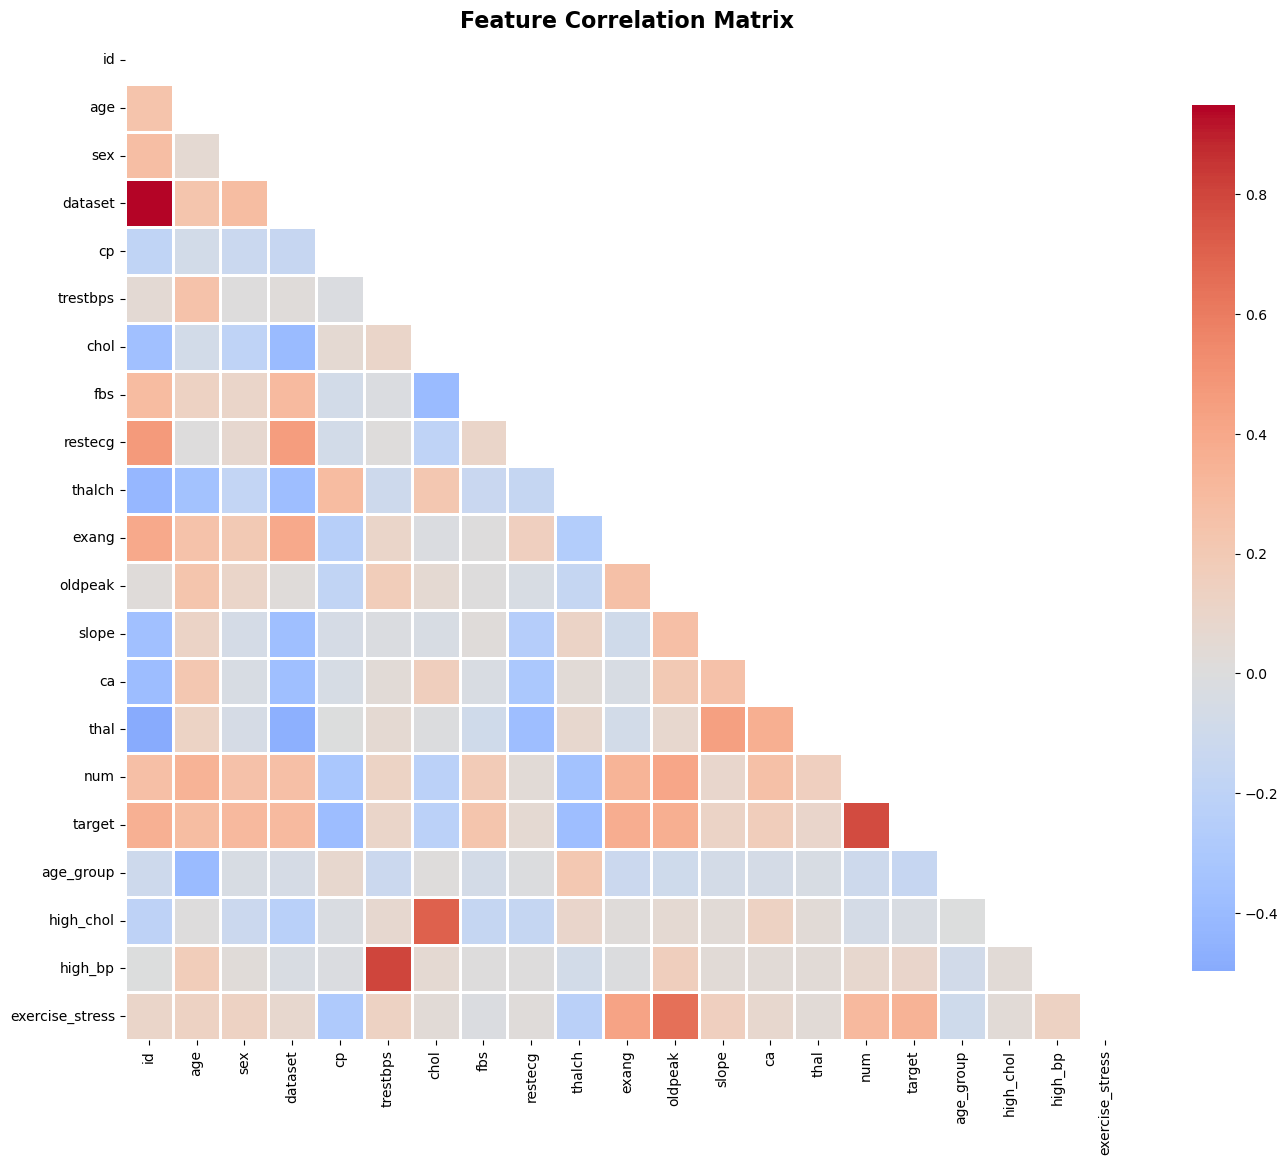


🎯 Top 10 correlations with target:
num                0.783387
cp                 0.385077
thalch             0.381953
exang              0.376623
oldpeak            0.371369
id                 0.356086
exercise_stress    0.341725
sex                0.307284
dataset            0.295696
age                0.282700
Name: target, dtype: float64


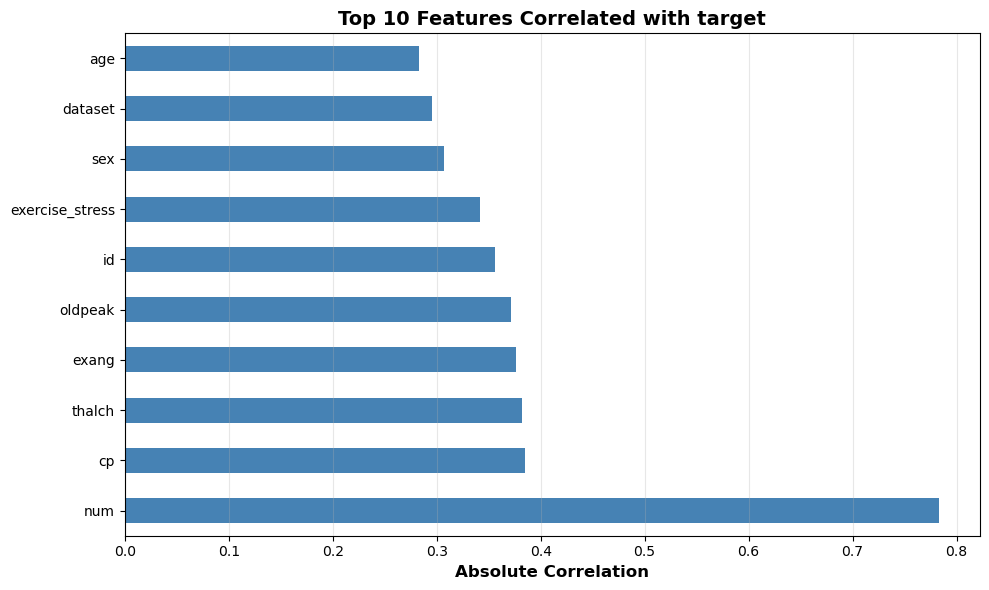

In [88]:
from sklearn.preprocessing import LabelEncoder

# Ensure plots show in notebooks
%matplotlib inline

# Copy original df
df_numeric = df.copy()

# Separate numeric and categorical columns
num_cols = df_numeric.select_dtypes(include='number').columns.tolist()
cat_cols = df_numeric.select_dtypes(exclude='number').columns.tolist()

# Fill missing values
df_numeric[num_cols] = df_numeric[num_cols].fillna(df_numeric[num_cols].median())
for col in cat_cols:
    df_numeric[col] = df_numeric[col].fillna(df_numeric[col].mode()[0])

# Encode categorical columns
for col in cat_cols:
    le = LabelEncoder()
    df_numeric[col] = le.fit_transform(df_numeric[col].astype(str))

# Correlation matrix
correlation_matrix = df_numeric.corr()

# Make sure correlation_matrix is not empty
if correlation_matrix.empty:
    print("⚠️ Correlation matrix is empty. Check numeric columns!")
else:
    # Heatmap
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f",
                cmap='coolwarm', center=0, square=True, linewidths=1,
                cbar_kws={"shrink": 0.8})
    plt.title("Feature Correlation Matrix", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Top correlations with target
    target_col = 'target'  # replace with your target column name
    if target_col not in correlation_matrix.columns:
        print(f"⚠️ Target column '{target_col}' not in correlation matrix!")
    else:
        target_corr = correlation_matrix[target_col].abs().sort_values(ascending=False)[1:11]
        print("\n🎯 Top 10 correlations with target:")
        print(target_corr)

        # Bar plot
        plt.figure(figsize=(10, 6))
        target_corr.plot(kind='barh', color='steelblue')
        plt.xlabel("Absolute Correlation", fontsize=12, fontweight='bold')
        plt.title(f"Top 10 Features Correlated with {target_col}", fontsize=14, fontweight='bold')
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()


In [30]:
# Feature Engineering (Clinical Logic)
# Models learn risk signals, not raw numbers
# These features are medically interpretable

# Age groups
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 45, 60, 100],
    labels=['Young', 'Middle', 'Senior']
)

# High cholesterol flag
df['high_chol'] = (df['chol'] >= 240).astype(int)

# High blood pressure flag
df['high_bp'] = (df['trestbps'] >= 140).astype(int)

# Exercise stress indicator
df['exercise_stress'] = ((df['exang'] == True) & (df['oldpeak'] > 1)).astype(int)

df[['age', 'age_group', 'high_chol', 'high_bp', 'exercise_stress']].head()


,age,age_group,high_chol,high_bp,exercise_stress
0,63,Senior,0,1,0
1,67,Senior,1,1,1
2,67,Senior,0,0,1
3,37,Young,1,0,0
4,41,Young,0,0,0


In [31]:
# Prepare features for modeling
X = df.drop(columns=['target'])
y = df['target']

In [32]:
# One-Hot Encode Categoricals
X_encoded = pd.get_dummies(
    X,
    columns=cat_cols,
    drop_first=True
)

X_encoded.shape

(920, 955)

In [33]:
#'num' in X_encoded.columns

In [34]:
# Train / Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

X_train.shape, X_test.shape


((736, 955), (184, 955))

In [35]:
X_train.dtypes.value_counts()

bool        946
int64         4
float64       4
category      1
Name: count, dtype: int64

In [36]:
# Identify bool and category columns
bool_cols = X_train.select_dtypes('bool').columns
cat_cols  = X_train.select_dtypes('category').columns

# Convert booleans to integers
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols]  = X_test[bool_cols].astype(int)

# Convert category columns to numeric codes
X_train[cat_cols] = X_train[cat_cols].apply(lambda col: col.cat.codes)
X_test[cat_cols]  = X_test[cat_cols].apply(lambda col: col.cat.codes)

# Verify all numeric
print(X_train.dtypes.value_counts())


int64      950
float64      4
int8         1
Name: count, dtype: int64


In [37]:
# Baseline Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [38]:
# Evaluation (Correct Metrics)
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        82
           1       0.99      1.00      1.00       102

    accuracy                           0.99       184
   macro avg       1.00      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184

ROC-AUC: 1.0


| Metric                   | What it measures                                           | Your values |
| ------------------------ | ---------------------------------------------------------- | ----------- |
| **Precision**            | Of the predicted positives, how many are actually positive | 0.99–1.00   |
| **Recall** (Sensitivity) | Of the actual positives, how many did we catch             | 0.99–1.00   |
| **F1-score**             | Harmonic mean of precision and recall                      | 0.99–1.00   |
| **Accuracy**             | Overall correct predictions                                | 0.99        |
| **ROC-AUC**              | Ability to separate classes (1 = perfect)                  | 1.0         |


Interpretation: Your model is extremely good at both classes, almost perfect.

It catches nearly all positive cases (heart disease)

Rarely mislabels negative cases

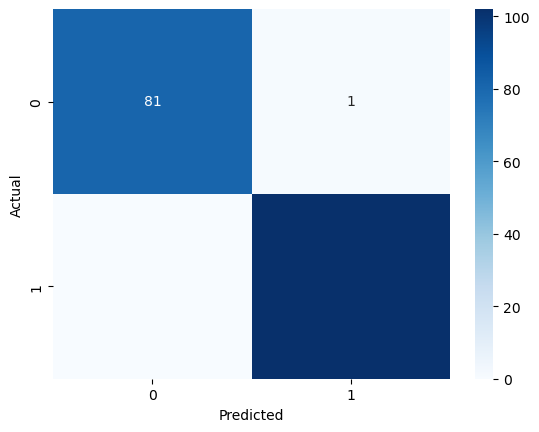

In [40]:
# Confusion matrix:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


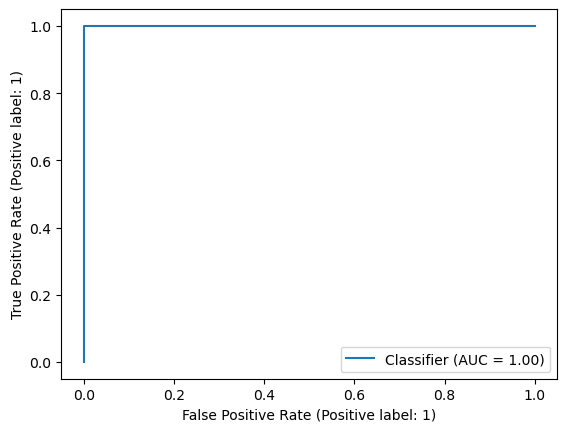

In [41]:
# ROC curve:
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.show()
